# **End-to-End Machine Learning Project**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 📖 TABLE OF CONTENTS

- [Main Steps of a Machine Learning Project](#Main-Steps-of-a-Machine-Learning-Project)
- [Look at the Big Picture](#Look-at-the-Big-Picture)
  - [Frame the Problem](#Frame-the-Problem)
  - [Select a Performance Measure](#Select-a-Performance-Measure)
  - [Check the Assumptions](#Check-the-Assumptions)
- [Get the Data](#Get-the-Data)
  - [Download the Data](#Download-the-Data)
  - [Take a Quick Look at the Data Structure](#Take-a-Quick-Look-at-the-Data-Structure)
  - [Create a Test Set](#Create-a-Test-Set)
    - [Random Split without seed](#Random-Split-without-seed)
    - [Random Split with seed](#Random-Split-with-seed)
    - [Deterministic Split using Hashing](#Deterministic-Split-using-Hashing)
    - [Stratified Sampling](#Stratified-Sampling)
- [Explore and Visualize the Data to Gain Insights](#Explore-and-Visualize-the-Data-to-Gain-Insights)
  - [Visualizing Geographical Data](#Visualizing-Geographical-Data)
  - [Look for Correlations](#Look-for-Correlations)
- [References](#References)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Main Steps of a Machine Learning Project

Main steps of a machine learning project are:
* Look at the big picture.
* Get the data.
* Explore and visualize the data to gain insights.
* Prepare the data for machine learning algorithms.
* Select and train a model.
* Fine-tune your model.
* Launch, monitor, and maintain your system.

**Note: Use [ML Project Checklist](https://github.com/ancilcleetus/My-Learning-Journey-in-AI/blob/main/Fundamentals-of-Machine-Learning/ml-project-checklist.md) as a helper for executing the above steps.**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Look at the Big Picture

Our task is to use California Housing Prices data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will call them “districts” for short. Our model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

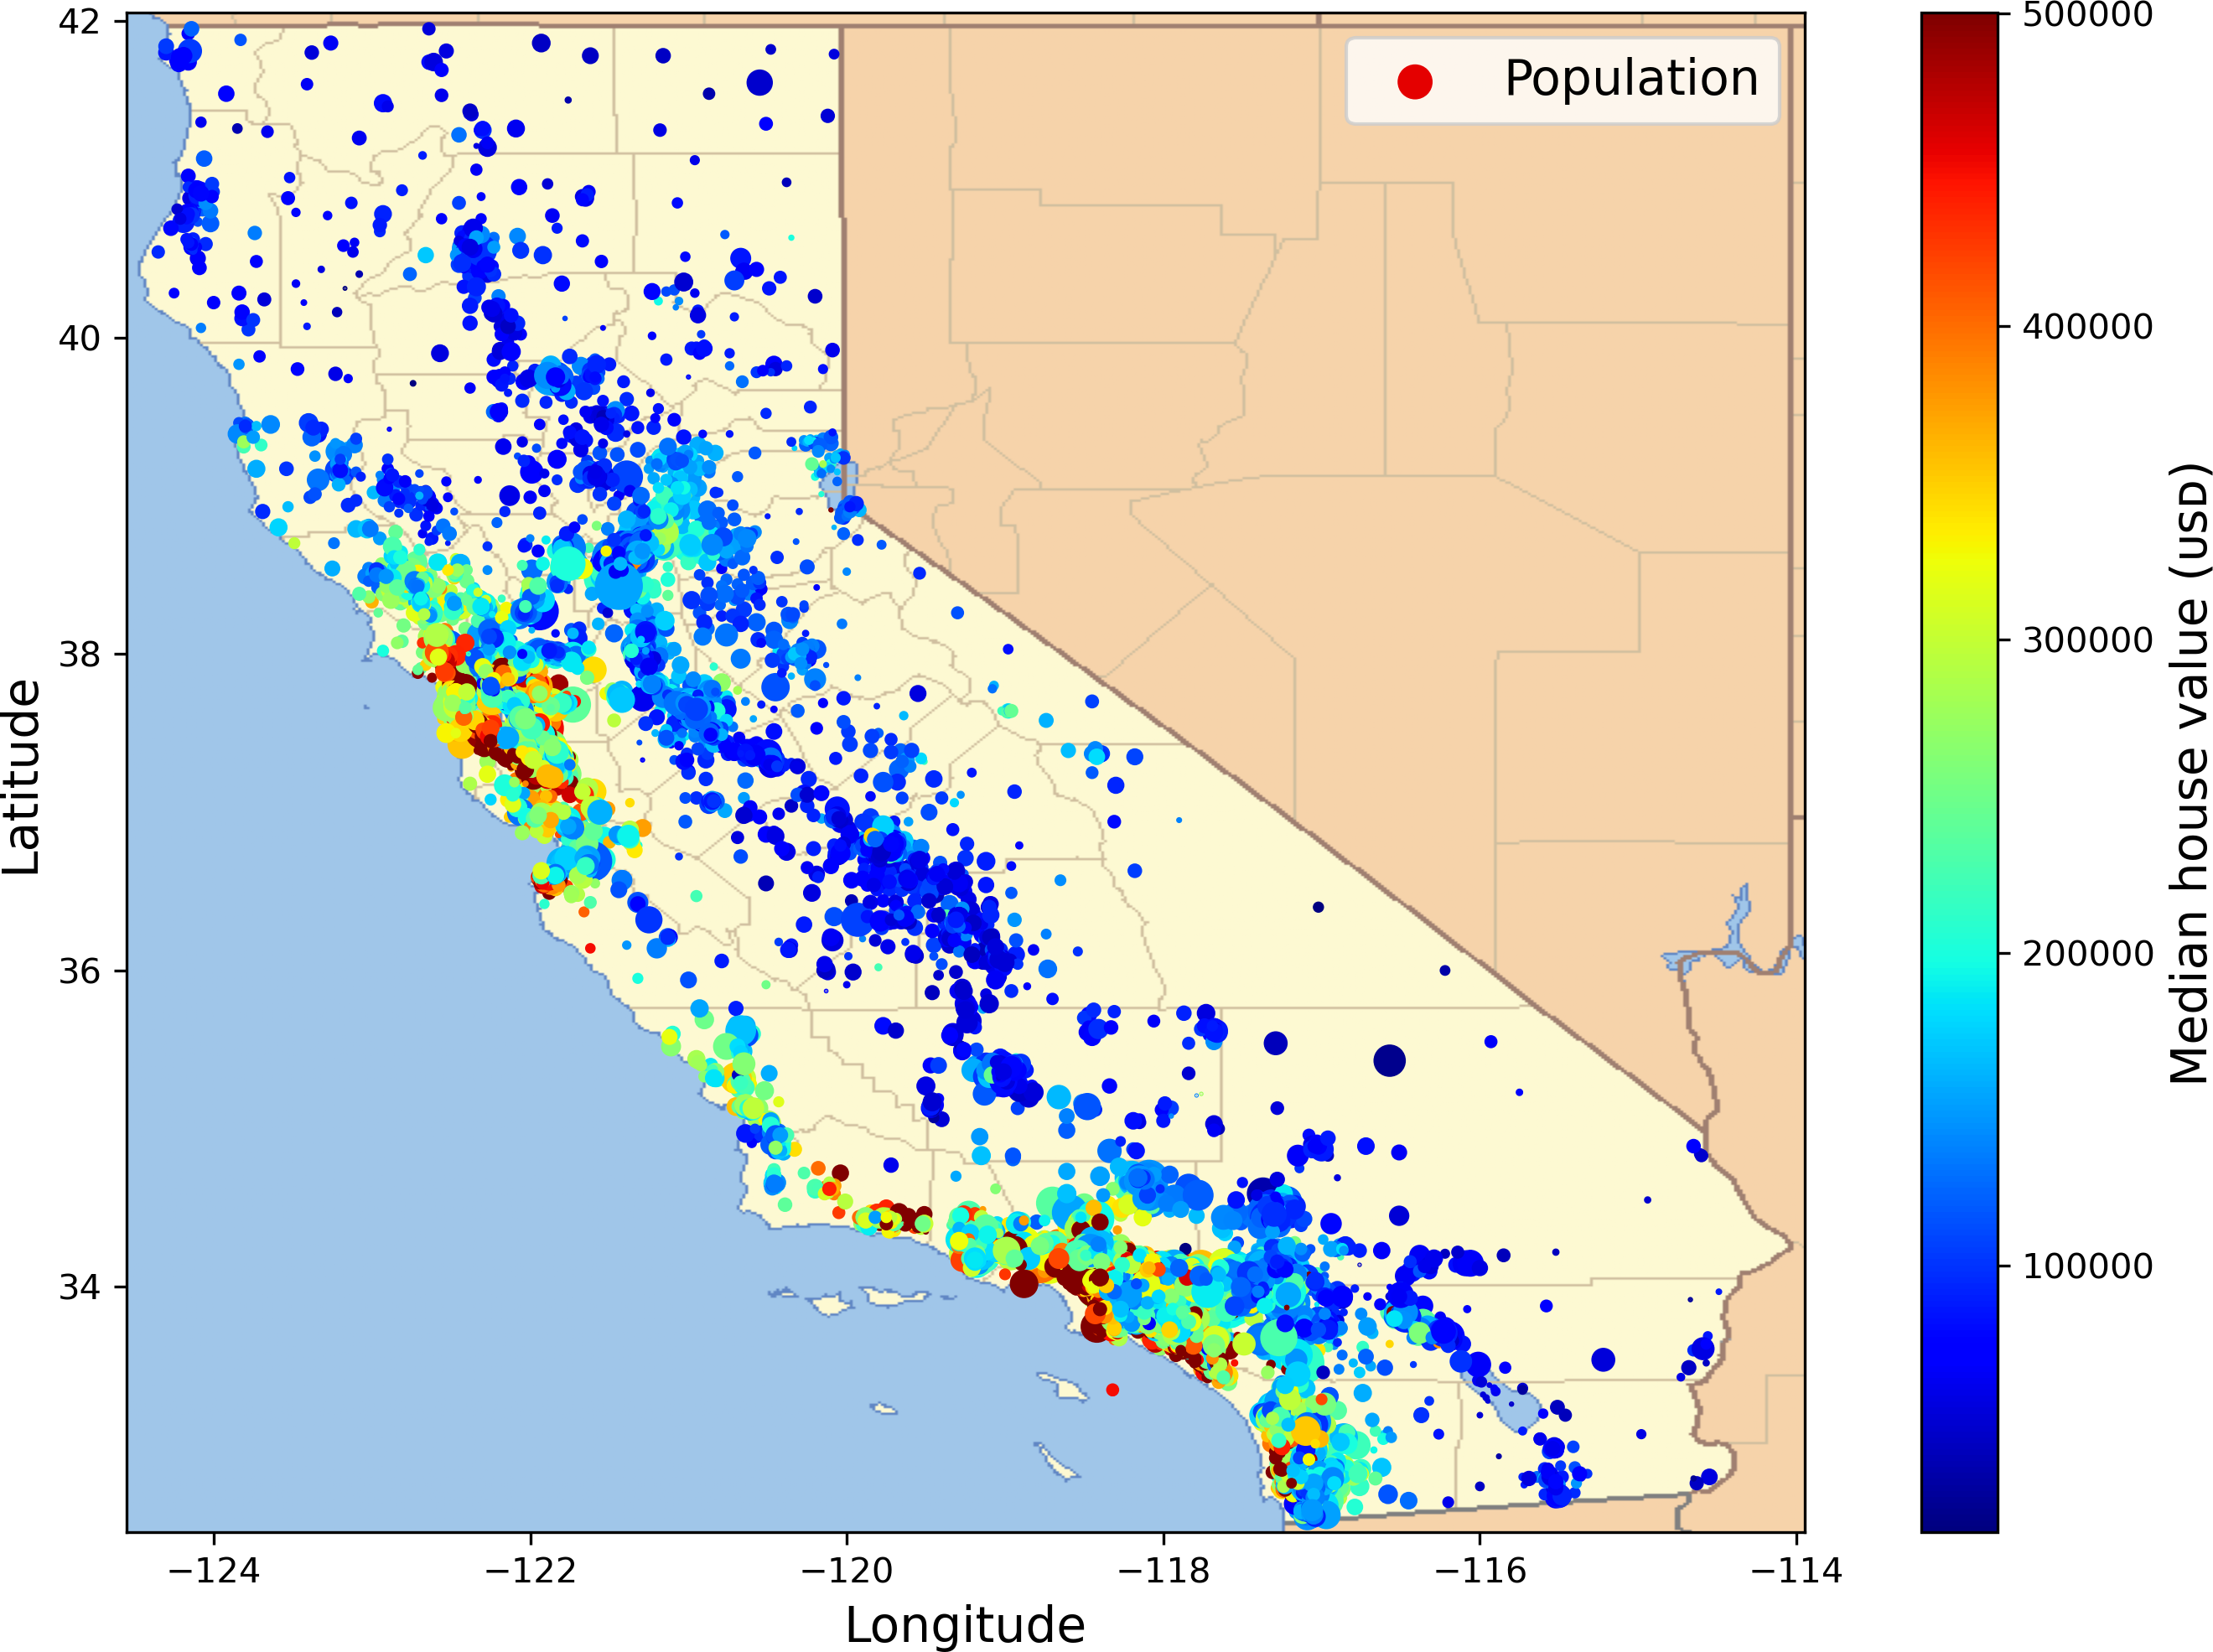

*California housing prices*

In [ ]:
from IPython.display import Image, display, Markdown
display(Image(filename="data/images/end_to_end_ml_project_01.png", width=500))
display(Markdown("*California housing prices*"))

## Frame the Problem

1. What exactly is the business objective? How does the company expect to use and benefit from this model?

    **Note:** *Knowing the objective is important because it will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.*
    
    **Answer:** Your boss answers that your model's output (a prediction of a district's median housing price) will be essential to determine whether it is worth investing in a given area. More specifically, your model's output will be fed to another machine learning system (see below figure), along with some other signals. So it's important to make our housing price model as accurate as we can.

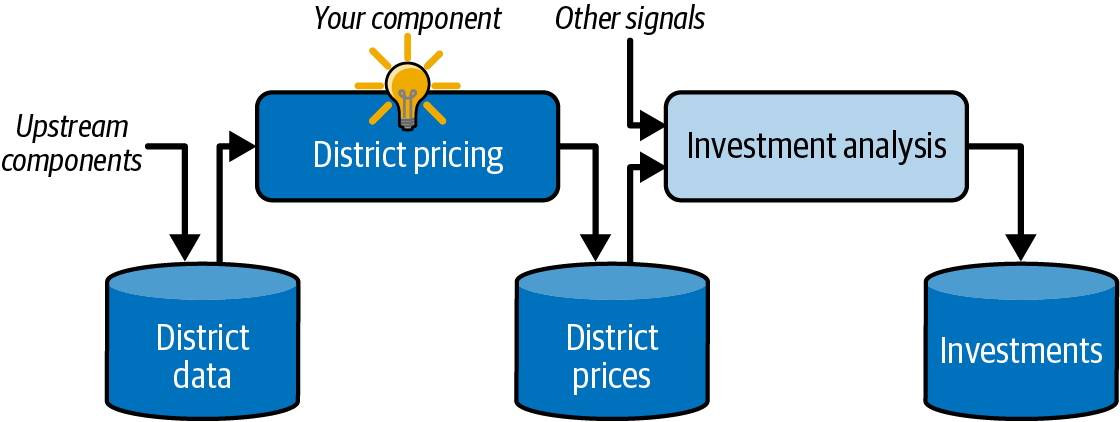

*A machine learning pipeline for real estate investments*

In [ ]:
from IPython.display import Image, display, Markdown
display(Image(filename="data/images/end_to_end_ml_project_02.png", width=500))
display(Markdown("*A machine learning pipeline for real estate investments*"))

2. What are the current solutions/workarounds (if any)?

    **Note:** *The current situation will often give you a reference for performance, as well as insights on how to solve the problem.*
    
    **Answer:** Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.

    This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 30%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price, given other data about that district.

3. How should you frame this problem (supervised/unsupervised, classification task/regression task, online learning/offline learning, etc.)?

    **Answer:**
    * Learning Mode
        * Supervised learning
        * Regression task
            * System uses multiple features for prediction => Multiple regression problem
            * Predict only a single value => Univariate regression problem
    * Training Mode
        * No continuous data coming into the system => no need to rapidly adapt model to changing data
        * Data is small to fit in memory
        * Hence, Offline/Batch learning

## Select a Performance Measure

* A typical performance measure for regression problems => Root Mean Squared Error (RMSE)
    * Higher weight given to larger errors
    * Quite sensitive to outliers => Not preferred if many outliers in the data
    * Equation for RMSE is $\text{RMSE}(\textbf{X}, \textbf{y}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(\textbf{x}^{(i)}) - y^{(i)} \right)^2}$ where

        * $m$ => number of instances in the dataset
    
        * $\textbf{x}^{(i)}$ => vector of all the feature values (excluding the label) of the ${i}^{th}$ instance in the dataset
    
        * $y^{(i)}$ => label of ${i}^{th}$ instance in the dataset
    
        * $\textbf{X}$ is a matrix containing all the feature values (excluding labels) of all instances in the dataset. In matrix $\textbf{X}$, ${i}^{th}$ row is equal to $(\textbf{x}^{(i)})^{T}$, the transpose of $\textbf{x}^{(i)}$.
    
        * $h$ is the prediction function of the system; ${\widehat{y}}^{(i)} = h(\textbf{x}^{(i)})$
* Many outliers in the data => Can consider Mean Absolute Error (MAE)
    * Equation for MAE is $\text{MAE}(\textbf{X}, \textbf{y}, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(\textbf{x}^{(i)}) - y^{(i)} \right|$

**Note 1:** We use lowercase italic font for scalar values (such as $m$ or $y^{(i)}$) and function names (such as $h$), lowercase bold font for vectors (such as $\textbf{x}^{(i)}$), and uppercase bold font for matrices (such as $\textbf{X}$).

**Note 2:** $l_k$ norm of a vector $\textbf{v}$ containing $n$ elements is defined as $\left\| \textbf{v} \right\|_k = (\left| v_1 \right|^k + \left| v_2 \right|^k + ... + \left| v_n \right|^k)^{1/k}$. RMSE corresponds to $l_2$ norm or Euclidean norm while MAE corresponds to $l_1$ norm or Manhattan norm. $l_0$ gives the no of nonzero elements in the vector while $l_∞$ gives the maximum absolute value in the vector.

**Note 3:** When outliers are exponentially rare, the RMSE performs very well and is generally preferred.

## Check the Assumptions

**Note:** *It is good practice to list and verify the assumptions that have been made so far (by you or others); this can help you catch serious issues early on.*

For example, let the downstream ML system converts housing prices output by our ML system to three categories (cheap, medium & expensive) and then uses those categories instead of the prices themselves. In this case, getting the price perfectly right is not important at all; your system just needs to get the category right. Then the problem should have been framed as a classification task, not a regression task. You don't want to find this out after working on a regression system for months.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Get the Data

## Download the Data

* In most environments, data will be stored in a relational database or some other common data store & spread across multiple tables or files.
* Rather than manually downloading and decompressing the data, it's usually preferable to write a function that does it for you. This is useful in particular if the data changes regularly. You can also set up a scheduled job to do that automatically at regular intervals.

Function to fetch and load the data is given below:

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets", filter="data")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_full = load_housing_data()

## Take a Quick Look at the Data Structure

In [2]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Note 1:** There are 20,640 instances in the dataset, which means that it is fairly small by machine learning standards, but it's perfect to get started. You notice that the `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. You will need to take care of this later.

**Note 2:** All attributes are numerical, except for `ocean_proximity`. Its type is `object`, so it could hold any kind of Python object. It looks like a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the `value_counts()` method.

In [4]:
housing_full["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


The `describe()` method shows a summary of the numerical attributes.

In [5]:
housing_full.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. You can either plot this one attribute at a time, or you can call the `hist()` method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute. The number of value ranges can be adjusted using the `bins` argument.

In [6]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

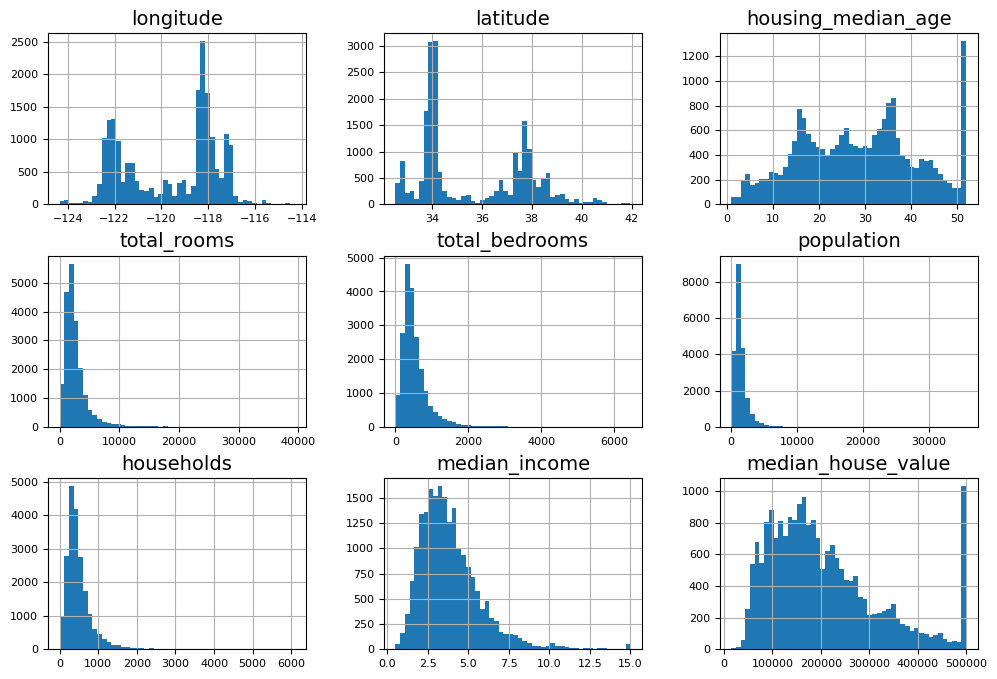

In [7]:
housing_full.hist(bins=50, figsize=(12, 8))
plt.show()

Looking at these histograms, you notice a few things:

* The `median_income` attribute is expressed in tens of thousands of dollars.
* The `median_income` attribute is scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes.
* The `housing_median_age` and the `median_house_value` were also capped. The `median_house_value` attribute may be a serious problem since it is your target attribute. Your machine learning algorithms may learn that prices never go beyond that limit. If we need precise predictions even beyond $500,000, then you have two options:
    * Collect proper labels for the districts whose labels were capped.
    * Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).
* Many histograms are skewed right: they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, you'll try transforming these attributes to have more symmetrical and bell-shaped distributions.

## Create a Test Set

* Before you look at the data any further, you need to create a test set, put it aside, and never look at it. If you look at this test set, you may find some patterns in it and may select an ML model suited for this test set. Hence, your generalization error estimate will be too optimistic leading to an ML model not working well as expected in production. This is called Data Snooping Bias.
* Creating a test set is theoretically simple; pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside.

### Random Split without seed

In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio, rng):
    shuffled_indices = rng.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
rng = np.random.default_rng()
train_set, test_set = shuffle_and_split_data(housing_full, 0.2, rng)
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16512
len(test_set): 4128


### Random Split with seed

Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your machine learning algorithms) will get to see the whole dataset, which is what you want to avoid.

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random number generator’s seed:

In [10]:
rng = np.random.default_rng(seed=42)
train_set, test_set = shuffle_and_split_data(housing_full, 0.2, rng)
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16512
len(test_set): 4128


### Deterministic Split using Hashing

* However, both these solutions will break the next time you fetch an updated dataset. We want a split that:
    * ✅ Is deterministic
    * ✅ Does not change when new data is added
    * ✅ Keeps old training data out of the test set forever
    * ✅ Automatically assigns ~20% of new data to test

* To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether it should go in the test set (assuming instances have unique and immutable identifiers). For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunately, the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID:

In [12]:
housing_with_id = housing_full.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16512
len(test_set): 4128


If you use the row index as a unique identifier, you need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then you can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so you could combine them into an ID like so:⁠

In [13]:
housing_with_id["id"] = (housing_full["longitude"] * 1000
                         + housing_full["latitude"])
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16322
len(test_set): 4318


**Note:** Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is `train_test_split(),` which does pretty much the same thing as the `shuffle_and_split_data()` function we defined earlier, with a couple of additional features.

In [14]:
from sklearn.model_selection import train_test_split

train_set_, test_set_ = train_test_split(housing_full, test_size=0.2,
                                       random_state=42)
print(f'len(train_set_): {len(train_set_)}')
print(f'len(test_set_): {len(test_set_)}')

len(train_set_): 16512
len(test_set_): 4128


### Stratified Sampling

* Large dataset => Random sampling is fine
* Test set should be representative of the overall population => Stratified sampling preferred
* In Stratified sampling,
    * Population is divided into homogeneous subgroups called strata
    * A particular no of instances from each strata is included in test set based on the distribution of strata in the population

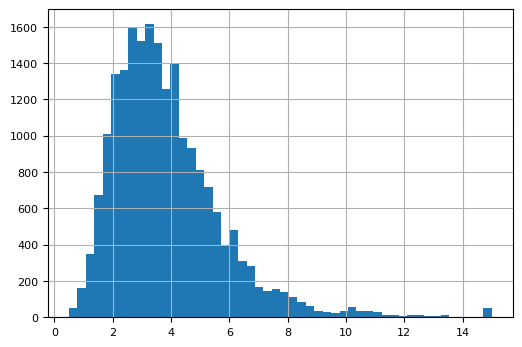

In [15]:
housing_full['median_income'].hist(bins=50, figsize=(6, 4))
plt.show()

* From expert opinions, `median_income` is a very important attribute to predict `median_house_value`. Hence, our test set should be representative of districts with all the ranges of median income.
* From the histogram of `median_income`, we can see that most districts have median income ranging from 1.5 to 6 (i.e. \$15000 to \$60000). We also have incomes below 1.5 and above 6. We need to create strata based on this.
* It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.
* We create an income category attribute `income_cat` with five categories (labeled from 1 to 5).
    * Category 1 => 0 to 1.5
    * Category 2 => 1.5 to 3
    * Category 3 => 3 to 4.5
    * Category 4 => 4.5 to 6
    * Category 5 => 6 to ∞

In [16]:
housing_full['income_cat'] = pd.cut(housing_full['median_income'],
                                     bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                     labels=[1, 2, 3, 4, 5])

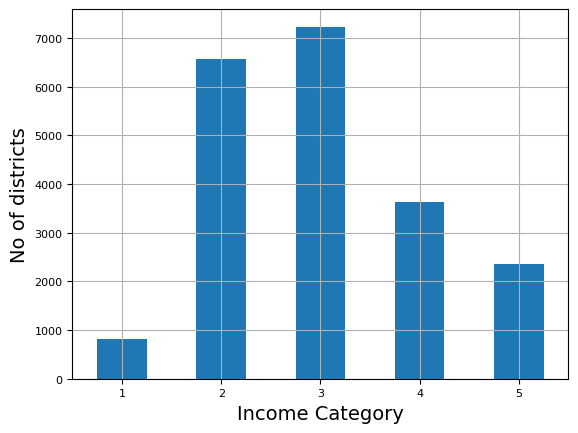

In [17]:
cat_counts = housing_full['income_cat'].value_counts().sort_index()
cat_counts.plot.bar(grid=True, rot=0)
plt.xlabel('Income Category')
plt.ylabel('No of districts')
plt.show()

Now you are ready to do stratified sampling based on the income category. Having multiple splits can be useful if you want to better estimate the performance of your model, as you will see when we discuss cross-validation.

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing_full,
                                              housing_full["income_cat"]):
    strat_train_set_n = housing_full.iloc[train_index]
    strat_test_set_n = housing_full.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0]  # Use first split
print(f'len(strat_train_set): {len(strat_train_set)}')
print(f'len(strat_test_set): {len(strat_test_set)}')

len(strat_train_set): 16512
len(strat_test_set): 4128


There’s a shorter way to get a single split using the `train_test_split()` function with the `stratify` argument.

In [19]:
strat_train_set, strat_test_set = train_test_split(
    housing_full, test_size=0.2, stratify=housing_full["income_cat"], random_state=42
)
print(f'len(strat_train_set): {len(strat_train_set)}')
print(f'len(strat_test_set): {len(strat_test_set)}')

len(strat_train_set): 16512
len(strat_test_set): 4128


We can compare the income category proportions in the full dataset vs stratified test set vs random test set.

In [20]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

from sklearn.model_selection import train_test_split

train_set_, test_set_ = train_test_split(housing_full, test_size=0.2,
                                       random_state=42)

compare_props = pd.DataFrame({
    "Full Dataset %": income_cat_proportions(housing_full),
    "Stratified Test Set %": income_cat_proportions(strat_test_set),
    "Random Test Set %": income_cat_proportions(test_set_),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified Test Set %"] /
                                   compare_props["Full Dataset %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random Test Set %"] /
                                  compare_props["Full Dataset %"] - 1)
(compare_props * 100).round(2)

,Full Dataset %,Stratified Test Set %,Random Test Set %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

You won’t use the `income_cat` column again, so you might as well drop it, reverting the data back to its original state:

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Explore and Visualize the Data to Gain Insights

Now, we need to dig deeper and get a really good understanding of the data. First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast during the exploration phase. In this case, the training set is quite small, so you can just work directly on the full set. Since you’re going to experiment with various transformations of the full training set, you should make a copy of the original so you can revert to it afterwards:

In [22]:
housing = strat_train_set.copy()
print(f'len(housing): {len(housing)}')

len(housing): 16512


## Visualizing Geographical Data

Because the dataset includes geographical information (latitude and longitude), it is a good idea to create a scatterplot of all the districts to visualize the data:

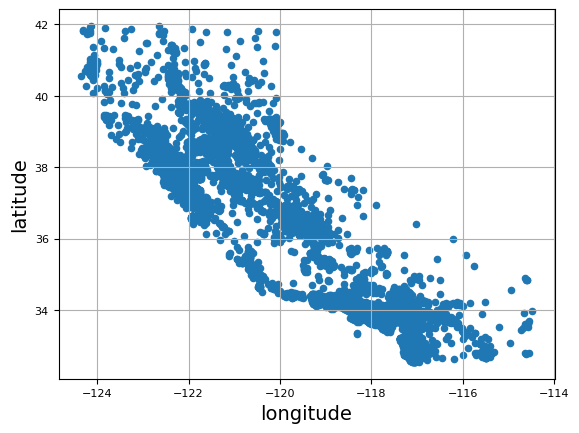

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.2 makes it much easier to visualize the places where there is a high density of data points.

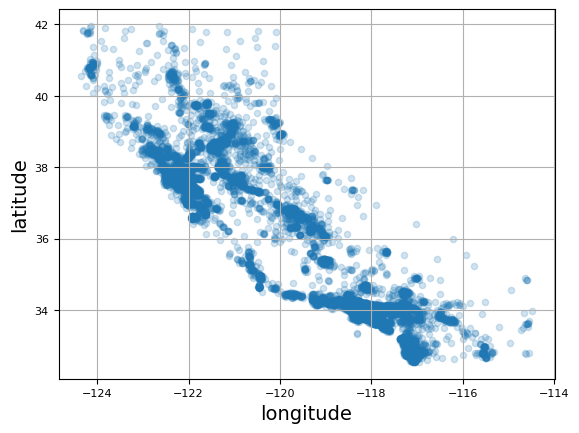

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Next, you look at the housing prices. The radius of each circle represents the district’s population (option `s`), and the color represents the price (option `c`). Here you use a predefined color map (option `cmap`) called `jet`, which ranges from blue (low values) to red (high prices):

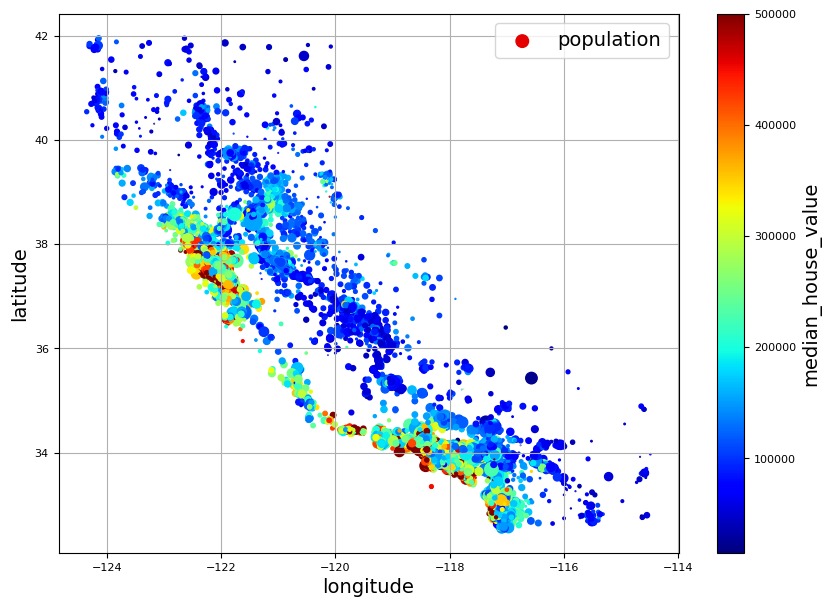

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"] / 100, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))

plt.show()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

## Look for Correlations

You can easily compute the *standard correlation coefficient* (also called Pearson's r) between every pair of numerical attributes using the `corr()` method:

In [26]:
corr_matrix = housing.corr(numeric_only=True)

Now you can look at how much each attribute correlates with the median house value:

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


* The correlation coefficient ranges from -1 to 1.
* Correlation coefficient close to 1 => strong positive correlation
    * Example: `median_house_value` tends to go up when the `median_income` goes up.
* Correlation coefficient close to -1 => strong negative correlation
    * Example: small negative correlation between `median_house_value` and `latitude` (i.e., prices have a slight tendency to go down when you go north).
* Correlation coefficient close to 0 => no linear correlation

Another way to check for correlation between attributes is to use the Pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute.

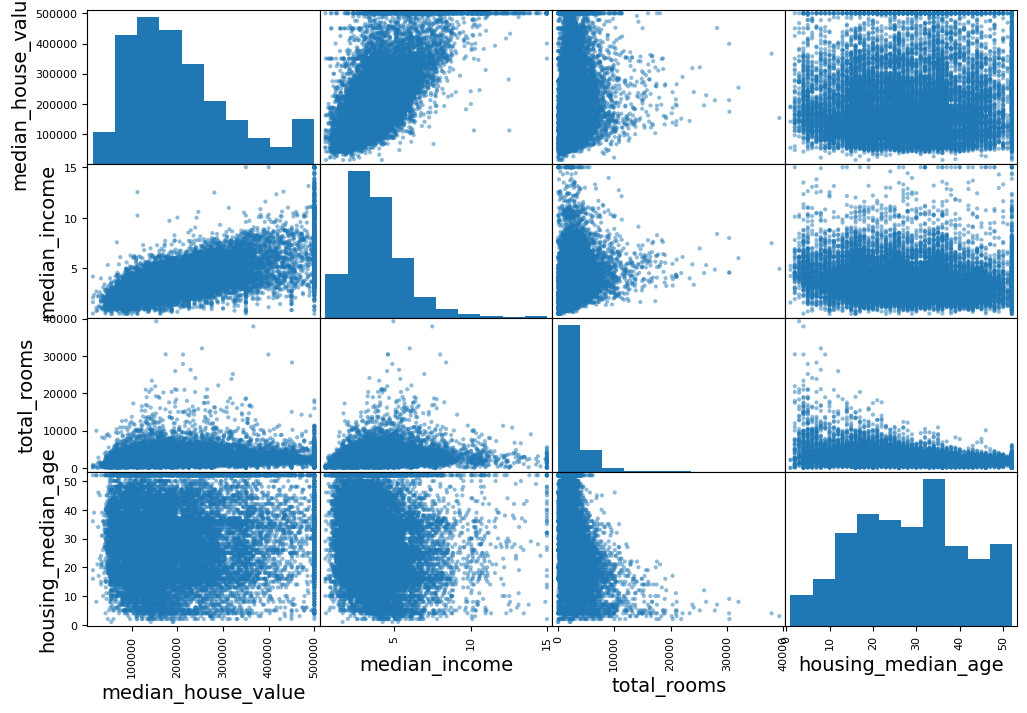

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
               "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

The main diagonal would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead, the Pandas displays a histogram of each attribute (other options are available; see the Pandas documentation for more details).

Looking at the correlation scatterplots, it seems like the most promising attribute to predict the `median_house_value` is the `median_income`.

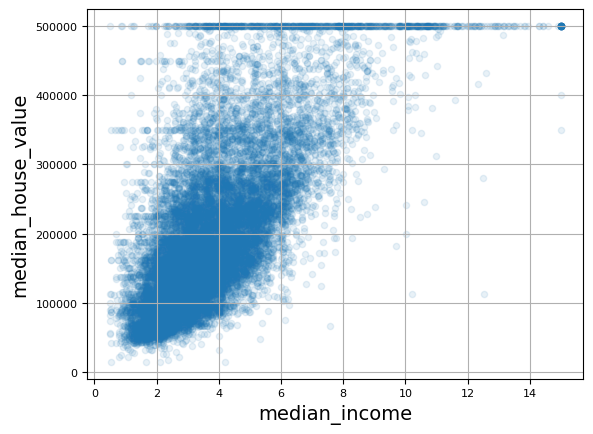

In [29]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)
plt.show()

* This plot reveals a few things.
    * First, the correlation is indeed quite strong; you can clearly see the upward trend, although the data is noisy.
    * Second, the price cap you noticed earlier is clearly visible as a horizontal line at $500,000.
    * But the plot also reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

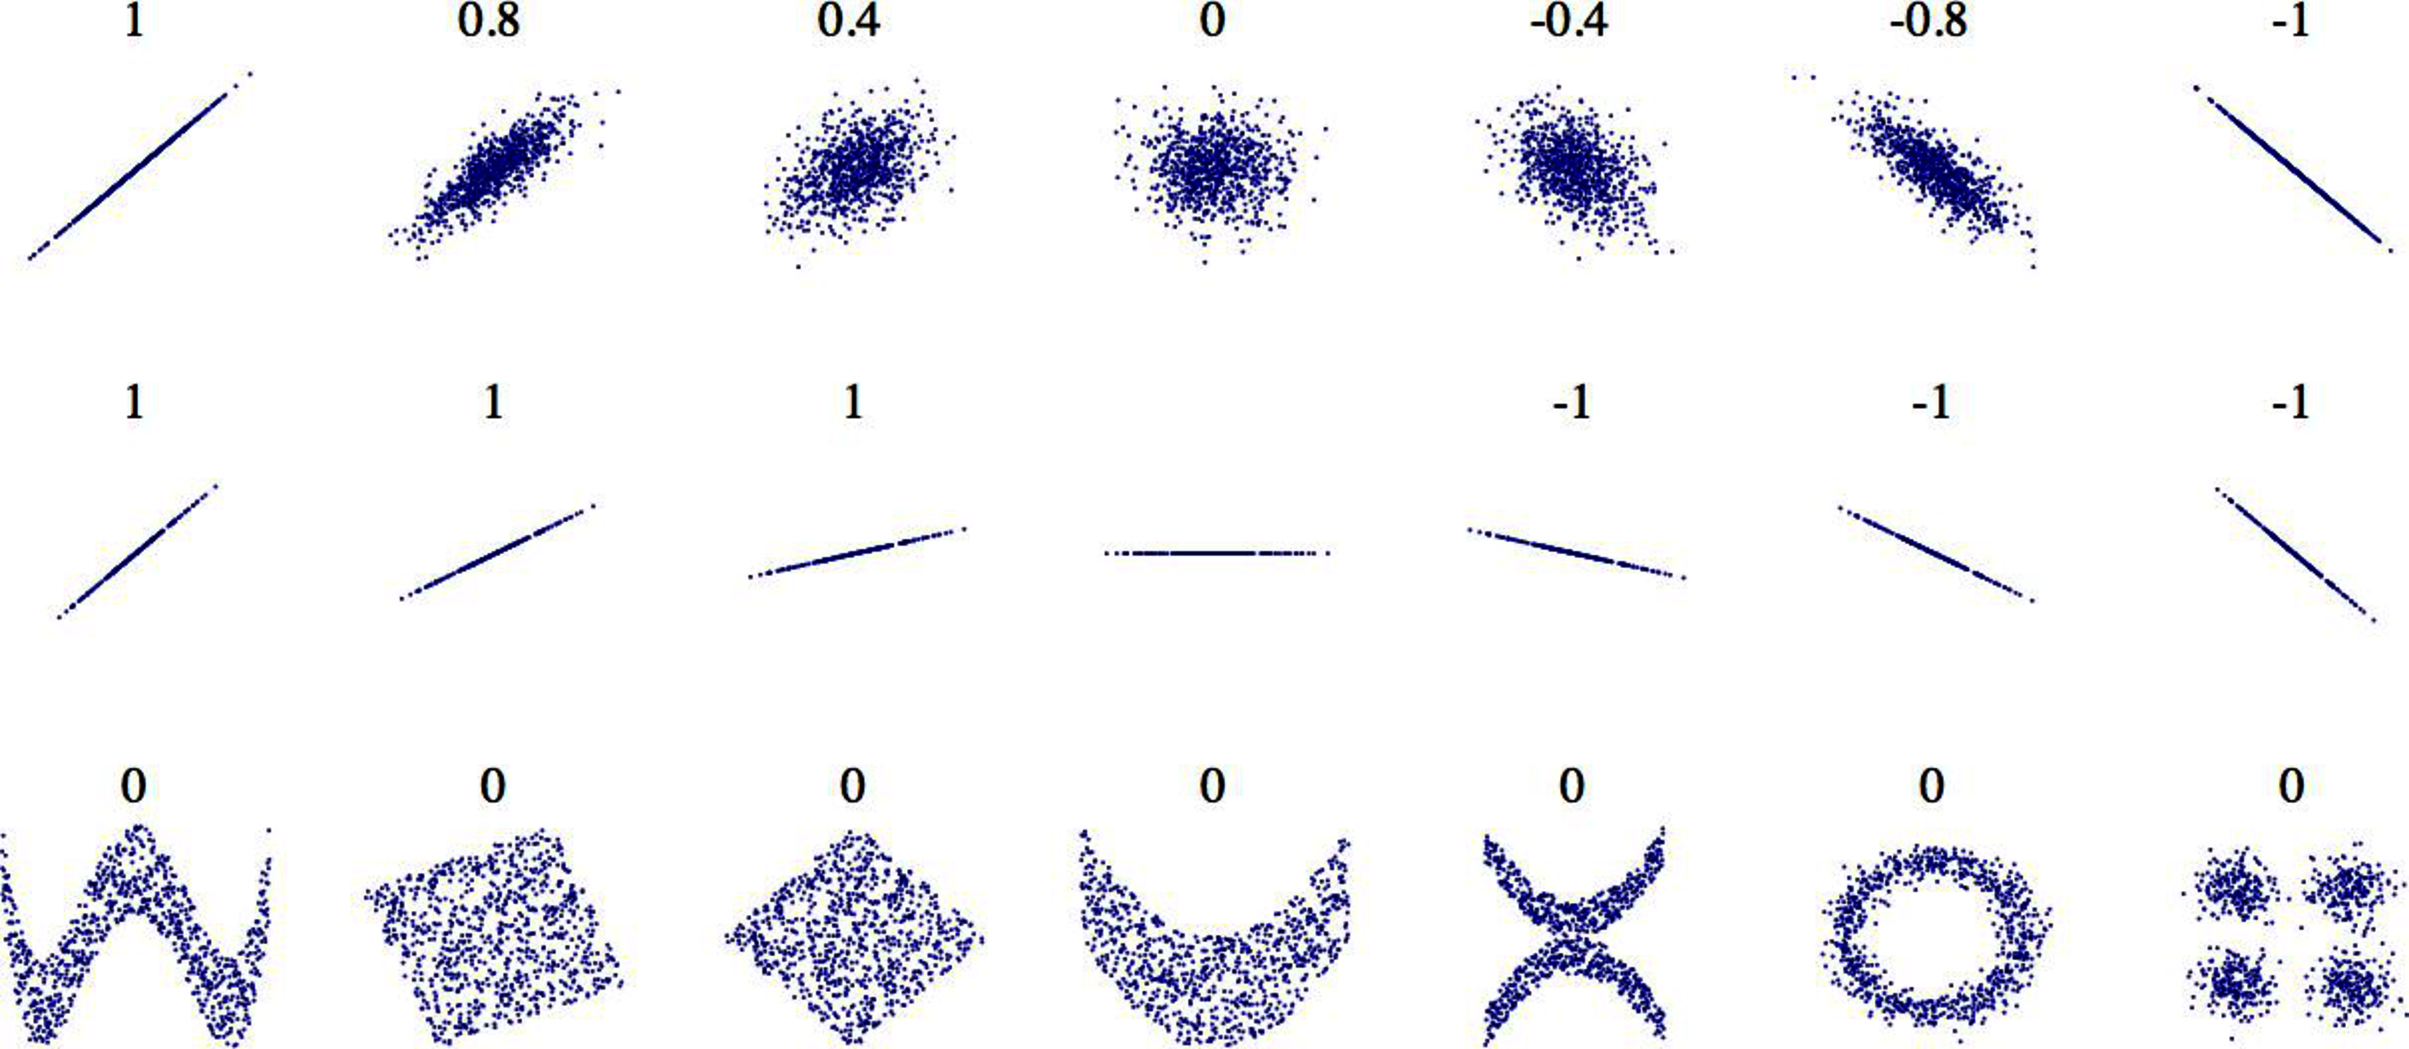

*Standard correlation coefficient of various datasets*

In [30]:
from IPython.display import Image, display, Markdown
display(Image(filename="data/images/end_to_end_ml_project_03.png", width=500))
display(Markdown("*Standard correlation coefficient of various datasets*"))

Note that the correlation coefficient only measures linear correlations (“as x goes up, y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “as x approaches 0, y generally goes up”). Figure above shows a variety of datasets along with their correlation coefficient. Note how all the plots of the bottom row have a correlation coefficient equal to 0, despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships. Also, the second row shows examples where the correlation coefficient is equal to 1 or -1; notice that this has nothing to do with the slope. For example, your height in inches has a correlation coefficient of 1 with your height in feet or in nanometers.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# References

- **Hands-On Machine Learning with Scikit-Learn and PyTorch by Aurélien Géron**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)